## Introduction to relational databases

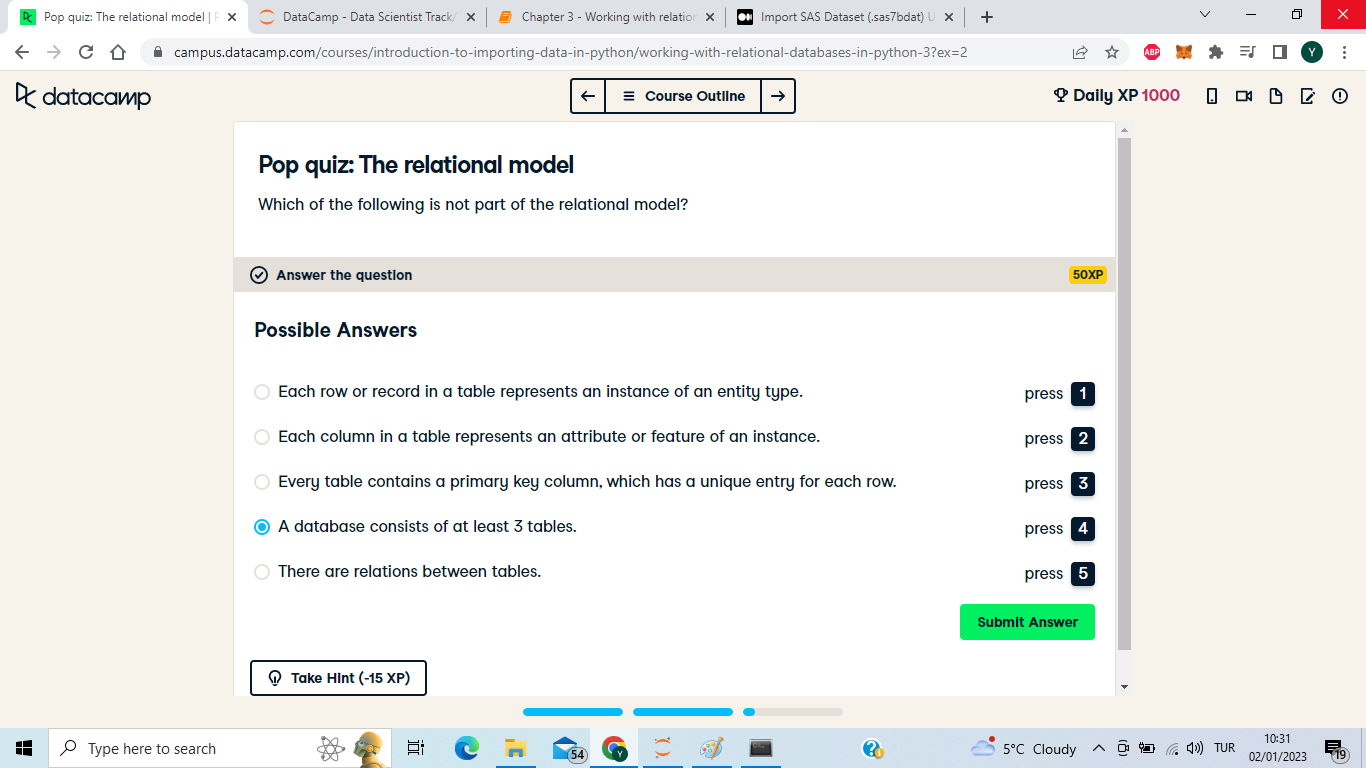

#### Creating a database engine in Python

In [1]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

In [2]:
# Import necessary module
from sqlalchemy import create_engine

# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Save the table names to a list: table_names
table_names = engine.table_names()

# Print the table names to the shell
print(table_names)


['Album', 'Artist', 'Customer', 'Employee', 'Genre', 'Invoice', 'InvoiceLine', 'MediaType', 'Playlist', 'PlaylistTrack', 'Track']


## Querying relational databases in Python
#### The Hello World of SQL Queries!
Now, it's time for liftoff! In this exercise, you'll perform the Hello World of SQL queries, SELECT, in order to retrieve all columns of the table Album in the Chinook database. Recall that the query SELECT * selects all columns.

In [3]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Open engine connection: con
con = engine.connect()

# Perform query: rs
rs = con.execute("select * from Album")

# Save results of the query to DataFrame: df
df = pd.DataFrame(rs.fetchall())

# Close connection
con.close()

# Print head of DataFrame df
print(df.head())


   0                                      1  2
0  1  For Those About To Rock We Salute You  1
1  2                      Balls to the Wall  2
2  3                      Restless and Wild  2
3  4                      Let There Be Rock  1
4  5                               Big Ones  3


#### Customizing the Hello World of SQL Queries
Congratulations on executing your first SQL query! Now you're going to figure out how to customize your query in order to:

Select specified columns from a table;
Select a specified number of rows;
Import column names from the database table.
Recall that Hugo performed a very similar query customization in the video:

engine = create_engine('sqlite:///Northwind.sqlite')

with engine.connect() as con:
    rs = con.execute("SELECT OrderID, OrderDate, ShipName FROM Orders")
    df = pd.DataFrame(rs.fetchmany(size=5))
    df.columns = rs.keys()

In [4]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("select LastName,Title from Employee")
    df = pd.DataFrame(rs.fetchmany(size = 3))
    df.columns = rs.keys()

# Print the length of the DataFrame df
print(len(df))

# Print the head of the DataFrame df
print(df.head())

3
  LastName                Title
0    Adams      General Manager
1  Edwards        Sales Manager
2  Peacock  Sales Support Agent


#### Filtering your database records using SQL's WHERE
You can now execute a basic SQL query to select records from any table in your database and you can also perform simple query customizations to select particular columns and numbers of rows.

There are a couple more standard SQL query chops that will aid you in your journey to becoming an SQL ninja.

Let's say, for example that you wanted to get all records from the Customer table of the Chinook database for which the Country is 'Canada'. You can do this very easily in SQL using a SELECT statement followed by a WHERE clause as follows:

SELECT * FROM Customer WHERE Country = 'Canada'
In fact, you can filter any SELECT statement by any condition using a WHERE clause. This is called filtering your records.

In this interactive exercise, you'll select all records of the Employee table for which 'EmployeeId' is greater than or equal to 6.

Packages are already imported as follows:

import pandas as pd
from sqlalchemy import create_engine
Query away!

In [5]:
# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("select * from Employee where EmployeeId >= 6")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print the head of the DataFrame df
print(df.head())

   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   

              HireDate                      Address        City State Country  \
0  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  


#### Ordering your SQL records with ORDER BY
You can also order your SQL query results. For example, if you wanted to get all records from the Customer table of the Chinook database and order them in increasing order by the column SupportRepId, you could do so with the following query:

"SELECT * FROM Customer ORDER BY SupportRepId"
In fact, you can order any SELECT statement by any column.

In this interactive exercise, you'll select all records of the Employee table and order them in increasing order by the column BirthDate.

Packages are already imported as follows:

import pandas as pd
from sqlalchemy import create_engine
Get querying!

In [6]:
# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Open engine in context manager
with engine.connect() as con:
    rs = con.execute("select * from Employee order by BirthDate")
    df = pd.DataFrame(rs.fetchall())

    # Set the DataFrame's column names
    df.columns = rs.keys()

# Print head of DataFrame
print(df.head())


   EmployeeId  LastName FirstName                Title  ReportsTo  \
0           4      Park  Margaret  Sales Support Agent        2.0   
1           2   Edwards     Nancy        Sales Manager        1.0   
2           1     Adams    Andrew      General Manager        NaN   
3           5   Johnson     Steve  Sales Support Agent        2.0   
4           8  Callahan     Laura             IT Staff        6.0   

             BirthDate             HireDate              Address        City  \
0  1947-09-19 00:00:00  2003-05-03 00:00:00     683 10 Street SW     Calgary   
1  1958-12-08 00:00:00  2002-05-01 00:00:00         825 8 Ave SW     Calgary   
2  1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW    Edmonton   
3  1965-03-03 00:00:00  2003-10-17 00:00:00         7727B 41 Ave     Calgary   
4  1968-01-09 00:00:00  2004-03-04 00:00:00          923 7 ST NW  Lethbridge   

  State Country PostalCode              Phone                Fax  \
0    AB  Canada    T2P 5G3  +1 (403)

## Querying relational databases directly with pandas
#### Pandas and The Hello World of SQL Queries!
Here, you'll take advantage of the power of pandas to write the results of your SQL query to a DataFrame in one swift line of Python code!

You'll first import pandas and create the SQLite 'Chinook.sqlite' engine. Then you'll query the database to select all records from the Album table.

Recall that to select all records from the Orders table in the Northwind database, Hugo executed the following command:

df = pd.read_sql_query("SELECT * FROM Orders", engine)

In [8]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine("sqlite:///Chinook.sqlite")

# Execute query and store records in DataFrame: df
df = pd.read_sql_query("select * from Album", engine)

# Print head of DataFrame
print(df.head(), "\n")

# Open engine in context manager and store query result in df1
with engine.connect() as con:
    rs = con.execute("SELECT * FROM Album")
    df1 = pd.DataFrame(rs.fetchall())
    df1.columns = rs.keys()

# Confirm that both methods yield the same result
print(df.equals(df1))

   AlbumId                                  Title  ArtistId
0        1  For Those About To Rock We Salute You         1
1        2                      Balls to the Wall         2
2        3                      Restless and Wild         2
3        4                      Let There Be Rock         1
4        5                               Big Ones         3 

True


#### Pandas for more complex querying
Here, you'll become more familiar with the pandas function read_sql_query() by using it to execute a more complex query: a SELECT statement followed by both a WHERE clause AND an ORDER BY clause.

You'll build a DataFrame that contains the rows of the Employee table for which the EmployeeId is greater than or equal to 6 and you'll order these entries by BirthDate.

In [9]:
# Import packages
from sqlalchemy import create_engine
import pandas as pd

# Create engine: engine
engine = create_engine('sqlite:///Chinook.sqlite')

# Execute query and store records in DataFrame: df
df = pd.read_sql_query(
    "SELECT * FROM Employee WHERE EmployeeId >= 6 ORDER BY BirthDate",
    engine
)

# Print head of DataFrame
print(df.head())


   EmployeeId  LastName FirstName       Title  ReportsTo            BirthDate  \
0           8  Callahan     Laura    IT Staff          6  1968-01-09 00:00:00   
1           7      King    Robert    IT Staff          6  1970-05-29 00:00:00   
2           6  Mitchell   Michael  IT Manager          1  1973-07-01 00:00:00   

              HireDate                      Address        City State Country  \
0  2004-03-04 00:00:00                  923 7 ST NW  Lethbridge    AB  Canada   
1  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge    AB  Canada   
2  2003-10-17 00:00:00         5827 Bowness Road NW     Calgary    AB  Canada   

  PostalCode              Phone                Fax                    Email  
0    T1H 1Y8  +1 (403) 467-3351  +1 (403) 467-8772    laura@chinookcorp.com  
1    T1K 5N8  +1 (403) 456-9986  +1 (403) 456-8485   robert@chinookcorp.com  
2    T3B 0C5  +1 (403) 246-9887  +1 (403) 246-9899  michael@chinookcorp.com  


## Advanced querying: exploiting table relationships
#### The power of SQL lies in relationships between tables: INNER JOIN
Here, you'll perform your first INNER JOIN! You'll be working with your favourite SQLite database, Chinook.sqlite. For each record in the Album table, you'll extract the Title along with the Name of the Artist. The latter will come from the Artist table and so you will need to INNER JOIN these two tables on the ArtistID column of both.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:

"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"

In [11]:
# Open engine in context manager
# Perform query and save results to DataFrame: df
with engine.connect() as con:
    rs = con.execute("SELECT Title,Name from Album INNER JOIN Artist on \
                    Album.ArtistID = Artist.ArtistID")
    df = pd.DataFrame(rs.fetchall())
    df.columns = rs.keys()

# Print head of DataFrame df
print(df.head())


                                   Title       Name
0  For Those About To Rock We Salute You      AC/DC
1                      Balls to the Wall     Accept
2                      Restless and Wild     Accept
3                      Let There Be Rock      AC/DC
4                               Big Ones  Aerosmith


#### Filtering your INNER JOIN
Congrats on performing your first INNER JOIN! You're now going to finish this chapter with one final exercise in which you perform an INNER JOIN and filter the result using a WHERE clause.

Recall that to INNER JOIN the Orders and Customers tables from the Northwind database, Hugo executed the following SQL query:

"SELECT OrderID, CompanyName FROM Orders INNER JOIN Customers on Orders.CustomerID = Customers.CustomerID"

In [12]:
# Execute query and store records in DataFrame: df
df = pd.read_sql_query("SELECT * from PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000", engine)

# Print head of DataFrame
print(df.head())

   PlaylistId  TrackId  TrackId              Name  AlbumId  MediaTypeId  \
0           1     3390     3390  One and the Same      271            2   
1           1     3392     3392     Until We Fall      271            2   
2           1     3393     3393     Original Fire      271            2   
3           1     3394     3394       Broken City      271            2   
4           1     3395     3395          Somedays      271            2   

   GenreId Composer  Milliseconds    Bytes  UnitPrice  
0       23     None        217732  3559040       0.99  
1       23     None        230758  3766605       0.99  
2       23     None        218916  3577821       0.99  
3       23     None        228366  3728955       0.99  
4       23     None        213831  3497176       0.99  
